In [44]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import os
import cv2
from matplotlib import pyplot as plt

In [45]:
data_json_test = '/opt/ml/detection/dataset/detector_test/result.bbox.json'
data_json_test

'/opt/ml/detection/dataset/detector_test/result.bbox.json'

In [142]:
with open(data_json_test, 'r') as outfile:
    data_test = (json.load(outfile))

df_test = pd.DataFrame(data_test) #이미지 데이터
df_test

,image_id,bbox,score,category_id
0,13,"[13.387908935546875, 471.632080078125, 76.5023...",0.609177,0
1,13,"[8.561347961425781, 153.53492736816406, 78.640...",0.456528,7
2,13,"[606.560302734375, 42.02838134765625, 104.2189...",0.429625,7
3,13,"[617.1527709960938, 23.468246459960938, 67.036...",0.404996,7
4,38,"[402.9405212402344, 169.59471130371094, 81.468...",0.513599,7
...,...,...,...,...
662,4859,"[406.2322998046875, 79.95795440673828, 74.3790...",0.428995,7
663,4866,"[467.3731689453125, 555.6437377929688, 97.7508...",0.439356,0
664,4866,"[278.31683349609375, 646.3544311523438, 76.338...",0.650072,5
665,4866,"[662.4429321289062, 545.6422119140625, 81.4295...",0.534275,7


In [48]:
data_json = '/opt/ml/detection/dataset/val_fold1.json'
data_json

'/opt/ml/detection/dataset/val_fold1.json'

In [52]:
with open(data_json, 'r') as outfile:
    data = (json.load(outfile))

df_truth = pd.DataFrame(data['images']) #이미지 데이터
df_truth_annotations = pd.DataFrame(data['annotations'])
df_truth_categories = pd.DataFrame(data['categories'])
df_truth.head(3)

,width,height,file_name,license,flickr_url,coco_url,date_captured,id
0,1024,1024,train/0001.jpg,0,None,None,2021-01-10 16:30:39,1
1,1024,1024,train/0002.jpg,0,None,None,2020-12-27 17:55:52,2
2,1024,1024,train/0013.jpg,0,None,None,2020-12-31 23:57:47,13


In [53]:
len(df_truth)

989

In [54]:
check_list = df_test['image_id'].unique()

def check_if_in(x):
    
    if x in check_list:
        
        return 'assume_over_1,2'
    
    else:
        
        return 'assume_under_1,2'

df_truth['assume'] = df_truth['id'].apply(check_if_in)
        

In [118]:
df_under = df_truth.loc[df_truth['assume'] == 'assume_under_1,2']
df_under = df_under.rename(columns={'id':'image_id'})
df_under_ann = df_under.merge(df_truth_annotations, how='left', on='image_id')
df_under_ann = df_under_ann.iloc[:, 7:]
df_under_count = df_under_ann['image_id'].value_counts().value_counts().to_frame()
print(df_under_count['image_id'].sum())
df_under_count.head(2)

662


,image_id
1,350
2,121


In [124]:
df_truth = df_truth.rename(columns={'id':'image_id'})
df_truth_ann = df_truth.merge(df_truth_annotations, how='left', on='image_id')
df_truth_count = df_truth_ann['image_id'].value_counts().value_counts().to_frame()
print(df_truth_count['image_id'].sum())
df_truth_count.head(2)

989


,image_id
1,398
2,160


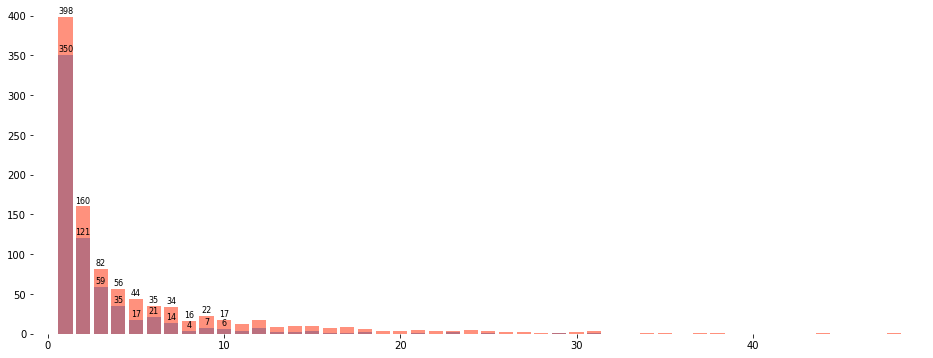

In [136]:
fig, ax = plt.subplots(1,1, figsize=(16,6))

ax.bar(df_under_count.index, df_under_count['image_id'], color='dodgerblue', alpha=1)
ax.bar(df_truth_count.index, df_truth_count['image_id'],  color='tomato', alpha=0.7)
ax.margins(0.03)
ax.set(frame_on=False)
for idx, val in df_under_count['image_id'].iteritems():
    if idx <= 10:
        ax.text(x=idx, y=val+2, s=val,
                va='bottom', ha='center',
                fontsize=8)
    
for idx, val in df_truth_count['image_id'].iteritems():
    if idx <= 10:
        ax.text(x=idx, y=val+2, s=val,
                va='bottom', ha='center',
                fontsize=8)

In [141]:
121/160

0.75625